## Data Pre-Processing

In [3]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Importing dataset
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')

# Separate dataset (X) and dependent vector (y)
X = dataset.filter(items=['Age', 'EstimatedSalary'])
y = dataset.filter(items=['Purchased'])

# Splitting Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = pd.DataFrame(sc_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(sc_X.transform(X_test), columns=X_test.columns)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## Kernel SVM classifier

[[55  3]
 [ 1 21]]


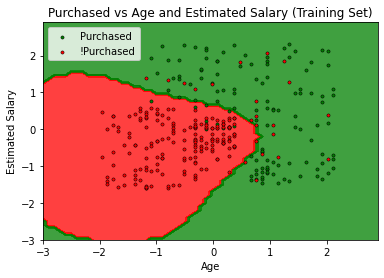

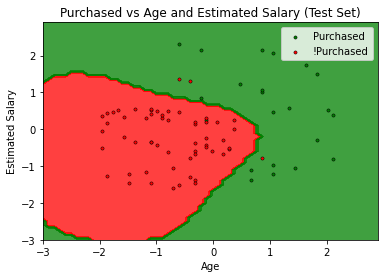

In [5]:
# Fitting classifier to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
plot_set = pd.concat([X_train, y_train], axis=1)
x1_column = 'Age'
x2_column = 'EstimatedSalary'
y_column = 'Purchased'

t_plot_set = plot_set.loc[plot_set[y_column] == 1]
f_plot_set = plot_set.loc[plot_set[y_column] == 0]

X1, X2 = np.meshgrid(
    np.arange(start = plot_set[x1_column].min().round(0) - 1, stop = plot_set[x1_column].max().round(0) + 1, step = 0.1),
    np.arange(start = plot_set[x2_column].min().round(0) - 1, stop = plot_set[x2_column].max().round(0) + 1, step = 0.1)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, 
    cmap = ListedColormap(('red','green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(t_plot_set[x1_column], t_plot_set[x2_column], c = 'green', label = 'Purchased', s = 10, edgecolors='black', linewidths=0.5)
plt.scatter(f_plot_set[x1_column], f_plot_set[x2_column], c = 'red', label = '!Purchased', s = 10, edgecolors='black', linewidth=0.5)

plt.title('Purchased vs Age and Estimated Salary (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


# Visualizing Test set
plot_set = pd.concat([X_test, y_test], axis=1)
x1_column = 'Age'
x2_column = 'EstimatedSalary'
y_column = 'Purchased'

t_plot_set = plot_set.loc[plot_set[y_column] == 1]
f_plot_set = plot_set.loc[plot_set[y_column] == 0]

X1, X2 = np.meshgrid(
    np.arange(start = plot_set[x1_column].min().round(0) - 1, stop = plot_set[x1_column].max().round(0) + 1, step = 0.1),
    np.arange(start = plot_set[x2_column].min().round(0) - 1, stop = plot_set[x2_column].max().round(0) + 1, step = 0.1)
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, 
    cmap = ListedColormap(('red','green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

plt.scatter(t_plot_set[x1_column], t_plot_set[x2_column], c = 'green', label = 'Purchased', s = 10, edgecolors='black', linewidths=0.5)
plt.scatter(f_plot_set[x1_column], f_plot_set[x2_column], c = 'red', label = '!Purchased', s = 10, edgecolors='black', linewidth=0.5)

plt.title('Purchased vs Age and Estimated Salary (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()